## Problem Statement 2:
An online retail store is trying to understand the various customer purchase patterns for their
firm, you are required to give enough evidence based insights to provide the same.

Total sales: 8300065.81
Number of orders: 20460


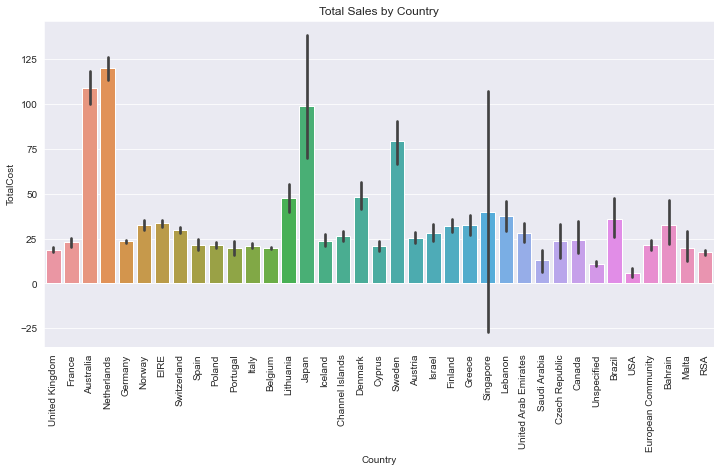

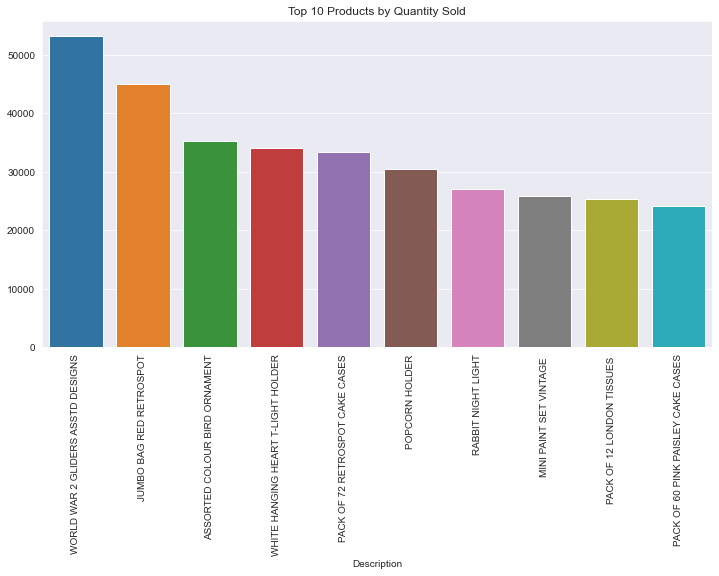

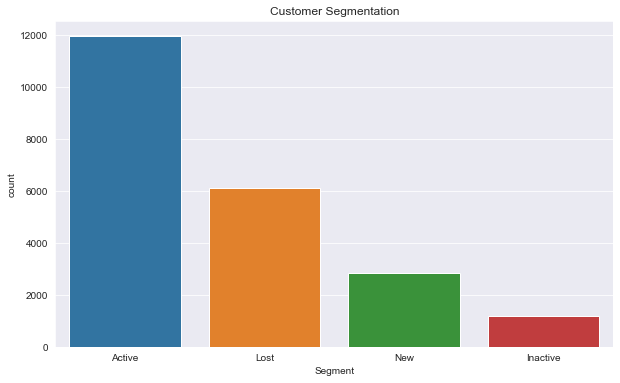

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data from the CSV file
data = pd.read_csv('onlineretail.csv', encoding='unicode_escape')

# Check the data for any missing values and drop them
data.isna().sum()
data.dropna(inplace=True)

# Check the data types of the columns
data.dtypes

# Convert the InvoiceDate column to datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Create a new column for total cost
data['TotalCost'] = data['Quantity'] * data['UnitPrice']

# Calculate the total sales and number of orders
total_sales = data['TotalCost'].sum()
num_orders = data['InvoiceDate'].nunique()

# Print the total sales and number of orders
print(f"Total sales: {total_sales:.2f}")
print(f"Number of orders: {num_orders}")

# Visualize the sales distribution by country
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='TotalCost', data=data)
plt.xticks(rotation=90)
plt.title('Total Sales by Country')
plt.show()

# Visualize the top 10 products by quantity sold
top_products = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False)[:10]
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.xticks(rotation=90)
plt.title('Top 10 Products by Quantity Sold')
plt.show()

# Segment the customers based on their purchasing behavior
customer_data = data.groupby(['CustomerID', 'InvoiceDate']).agg({'TotalCost': 'sum', 'InvoiceDate': 'first'})
customer_data['NextPurchaseDate'] = customer_data.groupby('CustomerID')['InvoiceDate'].shift(-1)
customer_data['DaysToNextPurchase'] = (customer_data['NextPurchaseDate'] - customer_data['InvoiceDate']).dt.days

# Define the function to segment the customers
def customer_segmentation(days):
    if days <= 30:
        return 'Active'
    elif days <= 60:
        return 'New'
    elif days <= 90:
        return 'Inactive'
    else:
        return 'Lost'
    
# Apply the segmentation function to the data
customer_data['Segment'] = customer_data['DaysToNextPurchase'].apply(customer_segmentation)

# Visualize the customer segments
plt.figure(figsize=(10, 6))
sns.countplot(x='Segment', data=customer_data)
plt.title('Customer Segmentation')
plt.show()
